#AIM
Our main goal is to create a network(roadmap type) where we need to reach to our destination. We implemented it using simple python code, classes and functions. We will see how the agent learns to maximise rewards and go on the right path.

# IMPLEMENTATION
### Create a network

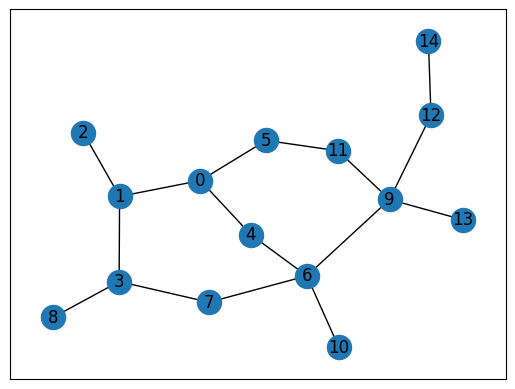

In [1]:
import numpy as np
import pylab as plt
import networkx as nx

# map cell to cell, add circular cell to goal point
points_list = [(0,1), (0,4), (0,5), (1,2), (1,3), (3,7), (3,8), (6,7), (4,6), (6,9), (6,10), (9,12), (9,13), (12,14), (5,11), (11,9)]
goal = 14
#plot graph
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

### Assign the rewards on the path nodes, create the matrix

This is our Reward matrix or say the game matrix. Which will have the rewards of moving in that direction.

In [2]:
# how many points in graph? x points
MATRIX_SIZE = 15

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1
# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
R[goal,goal]= 100
#R
print(R)

(0, 1)
(0, 4)
(0, 5)
(1, 2)
(1, 3)
(3, 7)
(3, 8)
(6, 7)
(4, 6)
(6, 9)
(6, 10)
(9, 12)
(9, 13)
(12, 14)
(5, 11)
(11, 9)
[[ -1.   0.  -1.  -1.   0.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.]
 [  0.  -1.   0.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.  -1.   0.   0.  -1.  -1.  -1.  -1.  -1.
   -1.]
 [  0.  -1.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.]
 [  0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.  -1.
   -1.]
 [ -1.  -1.  -1.  -1.   0.  -1.  -1.   0.  -1.   0.   0.  -1.  -1.  -1.
   -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.   0.   0.   0.
   -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.
   -1.]
 

### Define the available actions, next action, update functions

Here we will define our Q table learning table. This will contain the values upon learning the path to travel and will perform updates to this table. Basically, it containes q values or action function value.

In [4]:
#initialize the learning matrix with all zeros
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
# learning parameter
gamma = 0.8
initial_state = 0
#this method first extracts the node connections available, makes a list and returns it
#initially we start from node 1 so we get the connections with 1, i.e. nodes 0, 2, 5.
def available_actions(state):
    current_state_row = R[state,]
    print("current_state_row:", current_state_row)
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state)
print(available_act)

current_state_row: [[-1.  0. -1. -1.  0.  0. -1. -1. -1. -1. -1. -1. -1. -1. -1.]]
[1 4 5]


In [5]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action
#randomly selects one out of available paths to go
action = sample_next_action(available_act)
print(action)

1


<ipython-input-5-72b511aab2f5>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_act,1))


The update function will work by updating the Q table after each epoch or "episode" of the game. This will process the q table values untill it finds the best way to reach the goal.

In [6]:
def update(current_state, action, gamma):
  #select the indices where there is maximum.
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  #at first our matrix is zeros, so that is max and all are having max
  #this means it will take all possibilities into consideration.
  #if there is single max index, it will select that
  #if there are multiple ones, then it will make a random choice.
  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  #finally extract the max_value from index.
  max_value = Q[action, max_index]
  #gamma is our learning parameter, the other term is our reward for taking that step, both are summed up.
  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)
  #if a maximum value exists then we find the weightage of each with respect to maximum and sum it up to give the score.
  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)

update(initial_state, action, gamma)

max_value 0.0


<ipython-input-6-05fb1f402388>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(max_index, size = 1))


0

### Begin the training with 700 epochs, keep on updating the score

current_state_row: [[-1. -1. -1. -1. -1. -1.  0. -1. -1. -1. -1.  0.  0.  0. -1.]]
max_value 399.9509727546036
Score: 1583.1034833320718
current_state_row: [[ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.
  100.]]
max_value 319.9607782036829
Score: 1583.1034833320718
current_state_row: [[-1.  0. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]]
max_value 131.0107159432544
Score: 1583.1034833320718
current_state_row: [[ 0. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  0. -1. -1. -1.]]
max_value 255.9686225629463
Score: 1583.1034833320718
current_state_row: [[ 0. -1. -1. -1. -1. -1.  0. -1. -1. -1. -1. -1. -1. -1. -1.]]
max_value 163.763394929068
Score: 1583.1034833320718
current_state_row: [[-1. -1. -1. -1.  0. -1. -1.  0. -1.  0.  0. -1. -1. -1. -1.]]
max_value 319.9607782036829
Score: 1583.1034833320718
current_state_row: [[ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.
  100.]]
max_value 319.9607782036829
Score: 1583.1034833320718
current_

<ipython-input-5-72b511aab2f5>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_action = int(np.random.choice(available_act,1))
<ipython-input-6-05fb1f402388>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(max_index)
<ipython-input-6-05fb1f402388>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  max_index = int(np.random.choice(max_index, size = 1))


max_value 319.97489805035707
Score: 1583.3624983186514
current_state_row: [[-1.  0. -1. -1.  0.  0. -1. -1. -1. -1. -1. -1. -1. -1. -1.]]
max_value 204.78393475222856
Score: 1583.364305749766
current_state_row: [[ 0. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  0. -1. -1. -1.]]
max_value 163.82714780178287
Score: 1583.3657516946575
current_state_row: [[-1. -1. -1. -1. -1. -1.  0. -1. -1. -1. -1. -1. -1. -1. -1.]]
max_value 255.97991844028567
Score: 1583.3657516946575
current_state_row: [[-1.  0. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]]
max_value 131.0107159432544
Score: 1583.3657516946575
current_state_row: [[-1.  0. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]]
max_value 131.0107159432544
Score: 1583.3657516946575
current_state_row: [[-1.  0. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]]
max_value 131.0107159432544
Score: 1583.3657516946575
current_state_row: [[-1. -1. -1. -1. -1. -1.  0. -1. -1. -1. -1.  0.  0.  0. -1.]]
max_value 399.9799184402857
Score: 158

<ipython-input-9-b3019ea214a8>:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  next_step_index = int(next_step_index)


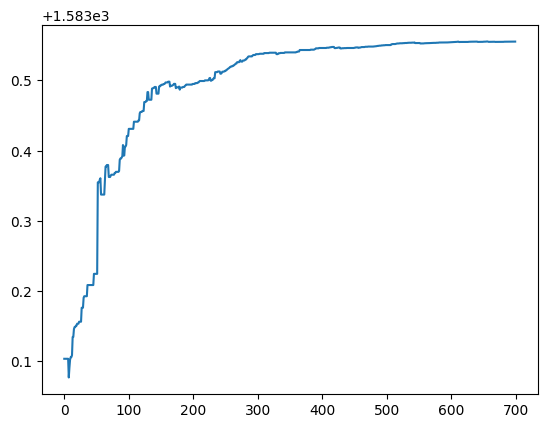

In [9]:
# Training
scores = []
for i in range(700):
    #take any one node to begin:[0,1,2,3,4,5,6,7]
    current_state = np.random.randint(0, int(Q.shape[0]))
    #calculate weight of each step
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))

# Q clearly tells that the score will be higher for the 0-1, 1-2, 2-7 paths.
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

# Testing
current_state = 0
#store the path
steps = [current_state]

while current_state != 14:
    #store the index where the weightage to go is maximum.
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    #if multiple ones have similar weightage, select one randomly out of them
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    #append it into the list of steps
    steps.append(next_step_index)
    #update the state
    current_state = next_step_index
#print the path
print("Most efficient path:")
print(steps)
#show scores
print(scores)
plt.plot(scores)
plt.show()

Observe the graph above, our reinforcement model has learned the right path to follow to reach goal from the start in the best way, to increase its rewards.

# CONCLUSION
We conclude that the agent can learn to maximise, by using rewards changing the state of ennvironment constantly, which makes our model achieve goals, with more fruitful rewards.
# APPLICATIONS
Some useful applications of RL are in maze solving, or similar game playings,  also we can find the safest route from a source to destination.

# BIBLIOGRAPHY
Resource credits: https://amunategui.github.io/reinforcement-learning/index.html

Information credits: https://christian-igel.github.io/paper/RLiaN.pdf

